In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels

In [94]:
df_1 = pd.read_csv('../data/clean/energy_savings.csv')
df_1

,Project_Id,ProjectName,Country,CertLevel,CertDate,GrossFloorAreaSqm,Energy_Saving_kWh,CO2_Avoided_kg
0,1000011028,Clarksburg Fire Station 35,US,Silver,2024-11-20,"2,139.09","48,130.00","21,177.00"
1,1000011315,Moultrie Courthouse - C Street Addition,US,Platinum,2024-08-30,"16,258.02","853,546.00","375,560.00"
2,1000012868,Petrocelli Surgical Pavilion Addition,US,Silver,2024-08-08,"26,830.48","2,817,200.00","1,239,568.00"
3,1000017965,CONF,US,Silver,2024-08-07,"30,028.29","1,126,061.00","495,467.00"
4,1000020194,UMD New Cole Fieldhouse,US,Silver,2024-11-08,"37,827.78","1,702,250.00","748,990.00"
...,...,...,...,...,...,...,...,...
2060,1000215829,Canny Elevator Technology Center,CN,Gold,2025-07-09,"8,377.00","314,138.00","175,917.00"
2061,1000216346,Mashreq Bank DOZ,AE,Gold,2025-07-30,"21,588.52","809,570.00","323,828.00"
2062,1000216631,Commerzone Kharadi R1/Building No 3,IN,Platinum,2025-08-01,"37,268.97","1,956,621.00","1,389,201.00"
2063,1000217225,"Kama Ayurveda Factory, Crafting Greener",IN,Platinum,2025-08-01,"2,015.62","493,827.00","350,617.00"


In [95]:
df_2 = pd.read_csv('../data/clean/sustainability_metrics.csv')
df_2

,Metric_Id,Project_Id,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
0,1,1000011028,"48,130.00","21,177.00",248.13,"5,133,816.00"
1,2,1000011315,"853,546.00","375,560.00","3,771.86","58,528,872.00"
2,3,1000012868,"2,817,200.00","1,239,568.00","15,025.07","107,321,920.00"
3,4,1000017965,"1,126,061.00","495,467.00","3,002.83","60,056,580.00"
4,5,1000020194,"1,702,250.00","748,990.00","3,782.78","37,827,780.00"
...,...,...,...,...,...,...
2060,2061,1000215829,"314,138.00","175,917.00","1,457.60","25,131,000.00"
2061,2062,1000216346,"809,570.00","323,828.00","3,756.40","64,765,560.00"
2062,2063,1000216631,"1,956,621.00","1,389,201.00","8,646.40","134,168,292.00"
2063,2064,1000217225,"493,827.00","350,617.00","2,257.49","12,093,720.00"


In [96]:
merged_df = pd.merge(df_1, df_2, on=['Project_Id'], how='outer')
merged_df

,Project_Id,ProjectName,Country,CertLevel,CertDate,GrossFloorAreaSqm,Energy_Saving_kWh,CO2_Avoided_kg,Metric_Id,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
0,1000011028,Clarksburg Fire Station 35,US,Silver,2024-11-20,"2,139.09","48,130.00","21,177.00",1,"48,130.00","21,177.00",248.13,"5,133,816.00"
1,1000011315,Moultrie Courthouse - C Street Addition,US,Platinum,2024-08-30,"16,258.02","853,546.00","375,560.00",2,"853,546.00","375,560.00","3,771.86","58,528,872.00"
2,1000012868,Petrocelli Surgical Pavilion Addition,US,Silver,2024-08-08,"26,830.48","2,817,200.00","1,239,568.00",3,"2,817,200.00","1,239,568.00","15,025.07","107,321,920.00"
3,1000017965,CONF,US,Silver,2024-08-07,"30,028.29","1,126,061.00","495,467.00",4,"1,126,061.00","495,467.00","3,002.83","60,056,580.00"
4,1000020194,UMD New Cole Fieldhouse,US,Silver,2024-11-08,"37,827.78","1,702,250.00","748,990.00",5,"1,702,250.00","748,990.00","3,782.78","37,827,780.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,1000215829,Canny Elevator Technology Center,CN,Gold,2025-07-09,"8,377.00","314,138.00","175,917.00",2061,"314,138.00","175,917.00","1,457.60","25,131,000.00"
2061,1000216346,Mashreq Bank DOZ,AE,Gold,2025-07-30,"21,588.52","809,570.00","323,828.00",2062,"809,570.00","323,828.00","3,756.40","64,765,560.00"
2062,1000216631,Commerzone Kharadi R1/Building No 3,IN,Platinum,2025-08-01,"37,268.97","1,956,621.00","1,389,201.00",2063,"1,956,621.00","1,389,201.00","8,646.40","134,168,292.00"
2063,1000217225,"Kama Ayurveda Factory, Crafting Greener",IN,Platinum,2025-08-01,"2,015.62","493,827.00","350,617.00",2064,"493,827.00","350,617.00","2,257.49","12,093,720.00"


In [97]:
columns_to_drop = ['Energy_Saving_kWh', 'CO2_Avoided_kg', 'Metric_Id']
sm_df = merged_df.drop(columns=columns_to_drop)
sm_df


,Project_Id,ProjectName,Country,CertLevel,CertDate,GrossFloorAreaSqm,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
0,1000011028,Clarksburg Fire Station 35,US,Silver,2024-11-20,"2,139.09","48,130.00","21,177.00",248.13,"5,133,816.00"
1,1000011315,Moultrie Courthouse - C Street Addition,US,Platinum,2024-08-30,"16,258.02","853,546.00","375,560.00","3,771.86","58,528,872.00"
2,1000012868,Petrocelli Surgical Pavilion Addition,US,Silver,2024-08-08,"26,830.48","2,817,200.00","1,239,568.00","15,025.07","107,321,920.00"
3,1000017965,CONF,US,Silver,2024-08-07,"30,028.29","1,126,061.00","495,467.00","3,002.83","60,056,580.00"
4,1000020194,UMD New Cole Fieldhouse,US,Silver,2024-11-08,"37,827.78","1,702,250.00","748,990.00","3,782.78","37,827,780.00"
...,...,...,...,...,...,...,...,...,...,...
2060,1000215829,Canny Elevator Technology Center,CN,Gold,2025-07-09,"8,377.00","314,138.00","175,917.00","1,457.60","25,131,000.00"
2061,1000216346,Mashreq Bank DOZ,AE,Gold,2025-07-30,"21,588.52","809,570.00","323,828.00","3,756.40","64,765,560.00"
2062,1000216631,Commerzone Kharadi R1/Building No 3,IN,Platinum,2025-08-01,"37,268.97","1,956,621.00","1,389,201.00","8,646.40","134,168,292.00"
2063,1000217225,"Kama Ayurveda Factory, Crafting Greener",IN,Platinum,2025-08-01,"2,015.62","493,827.00","350,617.00","2,257.49","12,093,720.00"


In [98]:
#Summarize key impact metrics like EnergySaving, CO2Avoided, WaterSaving, and WasteAvoided
#Rank countries based on those metrics

country_summary = sm_df.groupby('Country').agg({
    'EnergySaving': 'sum',
    'CO2Avoided': 'sum',
    'WaterSaving': 'sum',
    'WasteAvoided': 'sum'
}).reset_index()

metrics = ['EnergySaving', 'CO2Avoided', 'WaterSaving', 'WasteAvoided']

#Min-Max normalization per metric
for metric in metrics:
    min_val = country_summary[metric].min()
    max_val = country_summary[metric].max()
    country_summary[f'{metric}_norm'] = (country_summary[metric] - min_val) / (max_val - min_val)

#create combined sustainability score (sum of normalized metrics)
norm_cols = [f'{m}_norm' for m in metrics]
country_summary['SustainabilityScore'] = country_summary[norm_cols].sum(axis=1)

#rank countries by combined score
country_summary['Rank'] = country_summary['SustainabilityScore'].rank(ascending=False).astype(int)

#sort by rank
country_ranking = country_summary.sort_values('Rank')

country_ranking[['Country', 'SustainabilityScore', 'Rank'] + metrics]

,Country,SustainabilityScore,Rank,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
3,CN,4.00,1,"1,609,050,404.00","901,068,232.00","4,431,633.77","60,084,780,246.00"
6,IN,2.77,2,"927,461,987.00","658,498,009.00","4,120,326.29","33,224,542,085.00"
11,US,1.94,3,"676,091,746.00","297,480,368.00","2,866,432.49","35,167,656,408.00"
5,HK,0.55,4,"230,489,689.00","133,684,018.00","700,394.03","10,434,681,033.00"
0,AE,0.48,5,"185,334,323.00","74,133,729.00","919,897.71","9,011,340,877.00"
8,KR,0.29,6,"145,733,767.00","59,750,847.00","411,363.01","7,180,027,098.00"
2,CA,0.27,7,"118,667,453.00","36,786,912.00","500,064.59","6,876,280,840.90"
10,TR,0.13,8,"63,386,513.00","27,256,199.00","380,031.29","3,138,925,082.00"
1,BR,0.06,9,"57,972,566.00","7,536,430.00","236,459.73","2,650,348,142.00"
7,IT,0.06,10,"50,406,702.00","12,601,674.00","229,285.90","2,359,914,784.45"


In [99]:
pd.set_option('display.float_format', '{:,.2f}'.format)
metrics = ['EnergySaving', 'CO2Avoided', 'WaterSaving', 'WasteAvoided']

# Convert WasteAvoided to tons
country_ranking['WasteAvoided'] = country_ranking['WasteAvoided'] / 1000

# Round all metrics to 2 decimals
country_ranking[metrics] = country_ranking[metrics]
country_ranking[['Country', 'SustainabilityScore', 'Rank'] + metrics]

,Country,SustainabilityScore,Rank,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
3,CN,4.00,1,"1,609,050,404.00","901,068,232.00","4,431,633.77","60,084,780.25"
6,IN,2.77,2,"927,461,987.00","658,498,009.00","4,120,326.29","33,224,542.09"
11,US,1.94,3,"676,091,746.00","297,480,368.00","2,866,432.49","35,167,656.41"
5,HK,0.55,4,"230,489,689.00","133,684,018.00","700,394.03","10,434,681.03"
0,AE,0.48,5,"185,334,323.00","74,133,729.00","919,897.71","9,011,340.88"
8,KR,0.29,6,"145,733,767.00","59,750,847.00","411,363.01","7,180,027.10"
2,CA,0.27,7,"118,667,453.00","36,786,912.00","500,064.59","6,876,280.84"
10,TR,0.13,8,"63,386,513.00","27,256,199.00","380,031.29","3,138,925.08"
1,BR,0.06,9,"57,972,566.00","7,536,430.00","236,459.73","2,650,348.14"
7,IT,0.06,10,"50,406,702.00","12,601,674.00","229,285.90","2,359,914.78"


In [100]:
country_ranking.to_csv('key_impact_metrics.csv', index=False)

C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_2700\517264612.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SustainabilityScore', y='Country', data=top_countries, palette='viridis')


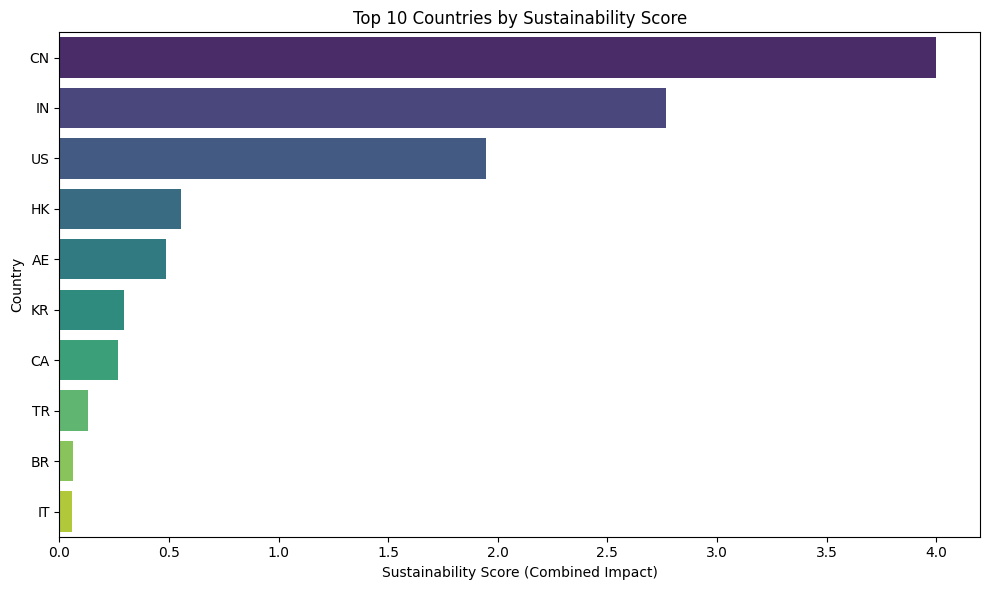

In [101]:
# Chart countries by rank 
top_countries = country_ranking.sort_values('Rank').head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='SustainabilityScore', y='Country', data=top_countries, palette='viridis')

plt.title('Top 10 Countries by Sustainability Score')
plt.xlabel('Sustainability Score (Combined Impact)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

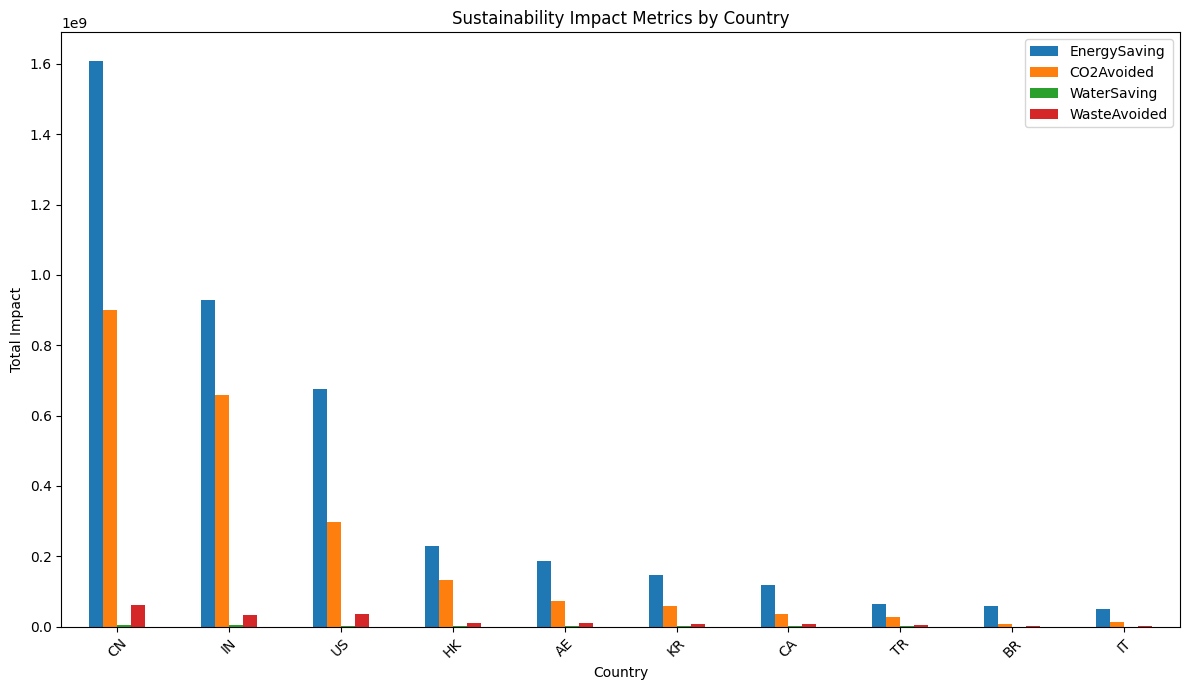

In [102]:
#sustainability impact metrics by country
metrics = ['EnergySaving', 'CO2Avoided', 'WaterSaving', 'WasteAvoided']

top_metrics = top_countries[['Country'] + metrics].set_index('Country')

top_metrics.plot(kind='bar', figsize=(12,7))
plt.title('Sustainability Impact Metrics by Country')
plt.ylabel('Total Impact')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

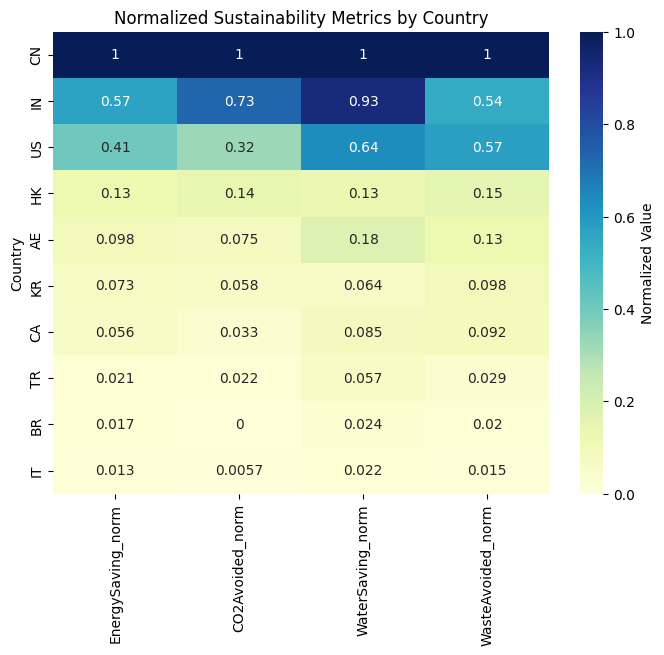

In [103]:
#heatmap sustainability metrics by country
norm_cols = [f'{m}_norm' for m in metrics]
heatmap_data = top_countries.set_index('Country')[norm_cols]

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Normalized Value'})
plt.title('Normalized Sustainability Metrics by Country')
plt.show()

In [104]:
sm_df.copy()

,Project_Id,ProjectName,Country,CertLevel,CertDate,GrossFloorAreaSqm,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided
0,1000011028,Clarksburg Fire Station 35,US,Silver,2024-11-20,"2,139.09","48,130.00","21,177.00",248.13,"5,133,816.00"
1,1000011315,Moultrie Courthouse - C Street Addition,US,Platinum,2024-08-30,"16,258.02","853,546.00","375,560.00","3,771.86","58,528,872.00"
2,1000012868,Petrocelli Surgical Pavilion Addition,US,Silver,2024-08-08,"26,830.48","2,817,200.00","1,239,568.00","15,025.07","107,321,920.00"
3,1000017965,CONF,US,Silver,2024-08-07,"30,028.29","1,126,061.00","495,467.00","3,002.83","60,056,580.00"
4,1000020194,UMD New Cole Fieldhouse,US,Silver,2024-11-08,"37,827.78","1,702,250.00","748,990.00","3,782.78","37,827,780.00"
...,...,...,...,...,...,...,...,...,...,...
2060,1000215829,Canny Elevator Technology Center,CN,Gold,2025-07-09,"8,377.00","314,138.00","175,917.00","1,457.60","25,131,000.00"
2061,1000216346,Mashreq Bank DOZ,AE,Gold,2025-07-30,"21,588.52","809,570.00","323,828.00","3,756.40","64,765,560.00"
2062,1000216631,Commerzone Kharadi R1/Building No 3,IN,Platinum,2025-08-01,"37,268.97","1,956,621.00","1,389,201.00","8,646.40","134,168,292.00"
2063,1000217225,"Kama Ayurveda Factory, Crafting Greener",IN,Platinum,2025-08-01,"2,015.62","493,827.00","350,617.00","2,257.49","12,093,720.00"


In [105]:
# map certlevel for numerically for correlation
level_mapping = {'Certified': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
sm_df['Cert_Level_Num'] = sm_df['CertLevel'].map(level_mapping)
sm_df

,Project_Id,ProjectName,Country,CertLevel,CertDate,GrossFloorAreaSqm,EnergySaving,CO2Avoided,WaterSaving,WasteAvoided,Cert_Level_Num
0,1000011028,Clarksburg Fire Station 35,US,Silver,2024-11-20,"2,139.09","48,130.00","21,177.00",248.13,"5,133,816.00",2
1,1000011315,Moultrie Courthouse - C Street Addition,US,Platinum,2024-08-30,"16,258.02","853,546.00","375,560.00","3,771.86","58,528,872.00",4
2,1000012868,Petrocelli Surgical Pavilion Addition,US,Silver,2024-08-08,"26,830.48","2,817,200.00","1,239,568.00","15,025.07","107,321,920.00",2
3,1000017965,CONF,US,Silver,2024-08-07,"30,028.29","1,126,061.00","495,467.00","3,002.83","60,056,580.00",2
4,1000020194,UMD New Cole Fieldhouse,US,Silver,2024-11-08,"37,827.78","1,702,250.00","748,990.00","3,782.78","37,827,780.00",2
...,...,...,...,...,...,...,...,...,...,...,...
2060,1000215829,Canny Elevator Technology Center,CN,Gold,2025-07-09,"8,377.00","314,138.00","175,917.00","1,457.60","25,131,000.00",3
2061,1000216346,Mashreq Bank DOZ,AE,Gold,2025-07-30,"21,588.52","809,570.00","323,828.00","3,756.40","64,765,560.00",3
2062,1000216631,Commerzone Kharadi R1/Building No 3,IN,Platinum,2025-08-01,"37,268.97","1,956,621.00","1,389,201.00","8,646.40","134,168,292.00",4
2063,1000217225,"Kama Ayurveda Factory, Crafting Greener",IN,Platinum,2025-08-01,"2,015.62","493,827.00","350,617.00","2,257.49","12,093,720.00",4


In [106]:
baseline_energy = sm_df['GrossFloorAreaSqm'] * 200
sm_df['EnergySaving_Percent'] = (sm_df['EnergySaving'] / baseline_energy) * 100
sm_df[['ProjectName', 'CertLevel', 'GrossFloorAreaSqm', 'EnergySaving', 'EnergySaving_Percent', 'Cert_Level_Num']]

,ProjectName,CertLevel,GrossFloorAreaSqm,EnergySaving,EnergySaving_Percent,Cert_Level_Num
0,Clarksburg Fire Station 35,Silver,"2,139.09","48,130.00",11.25,2
1,Moultrie Courthouse - C Street Addition,Platinum,"16,258.02","853,546.00",26.25,4
2,Petrocelli Surgical Pavilion Addition,Silver,"26,830.48","2,817,200.00",52.50,2
3,CONF,Silver,"30,028.29","1,126,061.00",18.75,2
4,UMD New Cole Fieldhouse,Silver,"37,827.78","1,702,250.00",22.50,2
...,...,...,...,...,...,...
2060,Canny Elevator Technology Center,Gold,"8,377.00","314,138.00",18.75,3
2061,Mashreq Bank DOZ,Gold,"21,588.52","809,570.00",18.75,3
2062,Commerzone Kharadi R1/Building No 3,Platinum,"37,268.97","1,956,621.00",26.25,4
2063,"Kama Ayurveda Factory, Crafting Greener",Platinum,"2,015.62","493,827.00",122.50,4


In [107]:
df_clean = sm_df.dropna(subset=['EnergySaving', 'GrossFloorAreaSqm', 'EnergySaving_Percent'])
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2064 entries, 0 to 2064
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Project_Id            2064 non-null   int64  
 1   ProjectName           2064 non-null   object 
 2   Country               2064 non-null   object 
 3   CertLevel             2064 non-null   object 
 4   CertDate              2064 non-null   object 
 5   GrossFloorAreaSqm     2064 non-null   float64
 6   EnergySaving          2064 non-null   float64
 7   CO2Avoided            2064 non-null   float64
 8   WaterSaving           2064 non-null   float64
 9   WasteAvoided          2064 non-null   float64
 10  Cert_Level_Num        2064 non-null   int64  
 11  EnergySaving_Percent  2064 non-null   float64
dtypes: float64(6), int64(2), object(4)
memory usage: 209.6+ KB


In [108]:
from scipy import stats

#change Certlevel to categorical
df_clean['CertLevel'] = df_clean['CertLevel'].astype('category')

# groupby EnergySaving_Percent by certification level
groups = [group['EnergySaving_Percent'].values for name, group in df_clean.groupby('CertLevel')]

#perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.2f}, p-value: {p_value:.4f}")

F-statistic: 102.41, p-value: 0.0000


C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_2700\1256157599.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['CertLevel'] = df_clean['CertLevel'].astype('category')
C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_2700\1256157599.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['EnergySaving_Percent'].values for name, group in df_clean.groupby('CertLevel')]


In [109]:
corr_spearman, p_value = spearmanr(df_clean['Cert_Level_Num'], df_clean['EnergySaving_Percent'])
print(f"Spearman correlation: {corr_spearman:.2f}, p-value: {p_value:.4f}")

Spearman correlation: 0.43, p-value: 0.0000


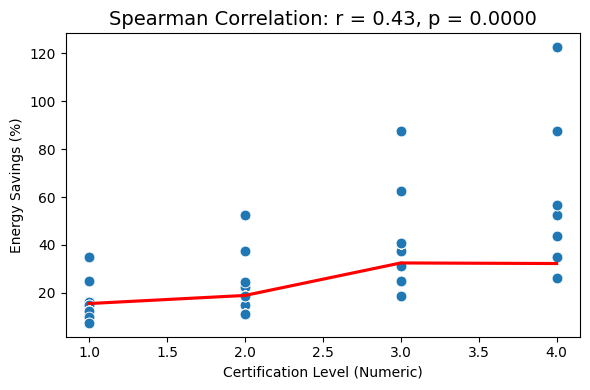

In [110]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x='Cert_Level_Num',
    y='EnergySaving_Percent',
    data=df_clean,
    s=60
)

sns.regplot(
    x='Cert_Level_Num',
    y='EnergySaving_Percent',
    data=df_clean,
    lowess=True,
    scatter=False,
    color='red'
)

plt.title(f"Spearman Correlation: r = {corr_spearman:.2f}, p = {p_value:.4f}", fontsize=14)
plt.xlabel("Certification Level (Numeric)")
plt.ylabel("Energy Savings (%)")
plt.tight_layout()
plt.show()

In [111]:
energy_pct_df = df_clean[['ProjectName', 'CertLevel', 'GrossFloorAreaSqm', 'EnergySaving', 'EnergySaving_Percent', 'Cert_Level_Num']]
energy_pct_df

,ProjectName,CertLevel,GrossFloorAreaSqm,EnergySaving,EnergySaving_Percent,Cert_Level_Num
0,Clarksburg Fire Station 35,Silver,"2,139.09","48,130.00",11.25,2
1,Moultrie Courthouse - C Street Addition,Platinum,"16,258.02","853,546.00",26.25,4
2,Petrocelli Surgical Pavilion Addition,Silver,"26,830.48","2,817,200.00",52.50,2
3,CONF,Silver,"30,028.29","1,126,061.00",18.75,2
4,UMD New Cole Fieldhouse,Silver,"37,827.78","1,702,250.00",22.50,2
...,...,...,...,...,...,...
2060,Canny Elevator Technology Center,Gold,"8,377.00","314,138.00",18.75,3
2061,Mashreq Bank DOZ,Gold,"21,588.52","809,570.00",18.75,3
2062,Commerzone Kharadi R1/Building No 3,Platinum,"37,268.97","1,956,621.00",26.25,4
2063,"Kama Ayurveda Factory, Crafting Greener",Platinum,"2,015.62","493,827.00",122.50,4


In [112]:
baseline_energy = energy_pct_df['GrossFloorAreaSqm'] * 200  # your reference energy use
energy_pct_df['EnergySaving_Percent'] = energy_pct_df['EnergySaving'] / baseline_energy
energy_pct_df

C:\Users\Brenda Villaverde\AppData\Local\Temp\ipykernel_2700\2964098833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_pct_df['EnergySaving_Percent'] = energy_pct_df['EnergySaving'] / baseline_energy


,ProjectName,CertLevel,GrossFloorAreaSqm,EnergySaving,EnergySaving_Percent,Cert_Level_Num
0,Clarksburg Fire Station 35,Silver,"2,139.09","48,130.00",0.11,2
1,Moultrie Courthouse - C Street Addition,Platinum,"16,258.02","853,546.00",0.26,4
2,Petrocelli Surgical Pavilion Addition,Silver,"26,830.48","2,817,200.00",0.52,2
3,CONF,Silver,"30,028.29","1,126,061.00",0.19,2
4,UMD New Cole Fieldhouse,Silver,"37,827.78","1,702,250.00",0.22,2
...,...,...,...,...,...,...
2060,Canny Elevator Technology Center,Gold,"8,377.00","314,138.00",0.19,3
2061,Mashreq Bank DOZ,Gold,"21,588.52","809,570.00",0.19,3
2062,Commerzone Kharadi R1/Building No 3,Platinum,"37,268.97","1,956,621.00",0.26,4
2063,"Kama Ayurveda Factory, Crafting Greener",Platinum,"2,015.62","493,827.00",1.23,4


In [113]:
energy_pct_df.to_csv('energy_saving_pct.csv', index=False)